 **HEKA Cardiovascular Diseases Competition**

These data are not homogeneous because they come from several hospitals not using the standard definitions for medical procedures. You can also have some aberrant values due to human health errors. You will therefore make sure to rinse them evenly before handling them.
Then from the train set, you will train your model in order to have the best F1-score possible. As soon as your model seems sufficiently accurate, you will evaluate your model with the test set and then submit your predictions in order to obtain your score.

Datos:
-	Numerical variables
o	BMI
o	Sleep time
o	Physical Health
o	Mental Health
o	Age

-	Cualitativas
o	Si/No
  	Smoking
  	Alcohol drinking
  	Stroke
  	Diff Walking
  	Diabetic
  	Physical Activity
  	Asthma
  	Kidney
  	Skin cancer
  	Heart Disease
o	Male/Female
  	Sex
o	CATEGORIAS
  	Race: White, Black, Hispanic,Other, American Indian/Alaskan Native, Asian
  	GenHealth: Good, very good, fair, excellent,poor



# **INTRODUCCIÓN AL DATA SET**

## *Importamos las librerías a utilizar*


In [1]:
#Checamos la versión de Python instalada, pues necesitamos Python 3.5
import sys
assert sys.version_info >= (3, 5)

# y se requiere además una versión de Scikit-Learn ≥ 0.20
import sklearn
assert sklearn.__version__ >= "0.20"

#Librerias de uso común
import numpy as np
import os
import pandas as pd
#para gráficos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# formato para las gráficas
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=11)
mpl.rc('ytick', labelsize=11)
# procesamiento
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler
from scipy.stats import norm
from scipy.stats import boxcox
#train y test set
from sklearn.model_selection import train_test_split



## *Obtención y visualización del Dataframe*

In [2]:
#leemos el CSV file y definimos la variable para nuestro dataframe
df = pd.read_csv('trainHEKA.csv')
# previsualización de datos, por default se ven los primeros 5
df.head()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,Yes,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Good,360 min,No,No,No,No
1,Patient_196414,37.59,Yes,No,No,7.0,20.0,No,Female,30-34,Hispanic,No,Yes,Very good,480 min,No,No,No,No
2,Patient_107743,19.37,Yes,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Good,2 hrs,No,No,No,No
3,Patient_28303,48.42,No,No,No,30.0,15.0,No,Female,30-34,White,No,Yes,Fair,8 hrs,No,No,No,No
4,Patient_118489,27.12,No,No,No,0.0,5.0,No,Male,65-69,White,No,Yes,Very good,360 min,Yes,No,No,No


Obtenemos la info de las columnas de nuestra base de datos. De esta forma,   podemos observar si contamos con las condiciones correctas para realizar el análisis estadístico

In [3]:
df.info() #info por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223856 entries, 0 to 223855
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Patient_ID        223856 non-null  object 
 1   BMI               223856 non-null  float64
 2   Smoking           223856 non-null  object 
 3   AlcoholDrinking   223856 non-null  object 
 4   Stroke            223856 non-null  object 
 5   PhysicalHealth    223856 non-null  float64
 6   MentalHealth      223856 non-null  float64
 7   DiffWalking       223856 non-null  object 
 8   Sex               223856 non-null  object 
 9   AgeCategory       223856 non-null  object 
 10  Race              223856 non-null  object 
 11  Diabetic          223856 non-null  object 
 12  PhysicalActivity  223856 non-null  object 
 13  GenHealth         223856 non-null  object 
 14  SleepTime         223856 non-null  object 
 15  Asthma            223856 non-null  object 
 16  KidneyDisease     22

Contamos con los mismos valores para cada columna, y tenemos variables de tipo objeto y flotante.

* Asimismo, obtenemos una descripción general de los datos de las columnas con variables numéricas:

In [4]:
#descripción general de los datos
df.describe()

,BMI,PhysicalHealth,MentalHealth
count,223856.000000,223856.000000,223856.000000
mean,28.319006,3.365561,3.887763
std,6.351305,7.934696,7.948452
min,12.020000,0.000000,0.000000
25%,24.030000,0.000000,0.000000
50%,27.320000,0.000000,0.000000
75%,31.400000,2.000000,3.000000
max,94.850000,30.000000,30.000000


In [5]:
df["Diabetic"].value_counts() #implementa un conteo

Diabetic
No                         188691
Yes                         28595
No, borderline diabetes      4809
Yes (during pregnancy)       1761
Name: count, dtype: int64

# **Análisis demográfico**
- Investigar la distribución de características demográficas: la edad, el sexo, la raza.
- Identificar las características demográficas más comunes entre los pacientes.

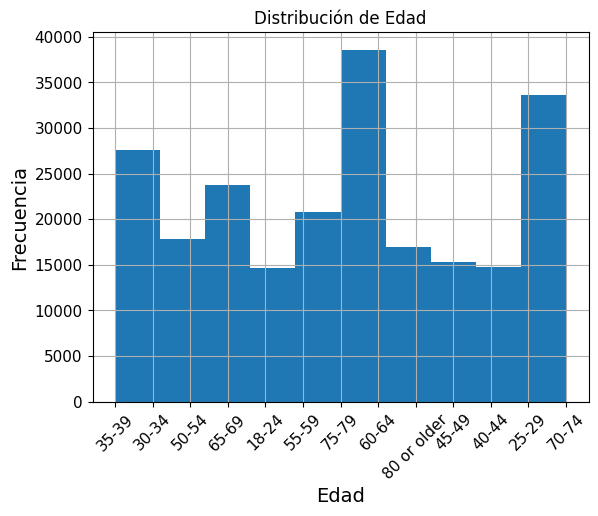

In [6]:
df["AgeCategory"].hist() #histograma de la edad
plt.title("Distribución de Edad") #titulo
plt.xlabel("Edad") #nombre variable x
plt.ylabel("Frecuencia") #nombre variable y
plt.xticks(rotation=45) #se rota 45 grados las etiquetas de los valores de x
plt.show()

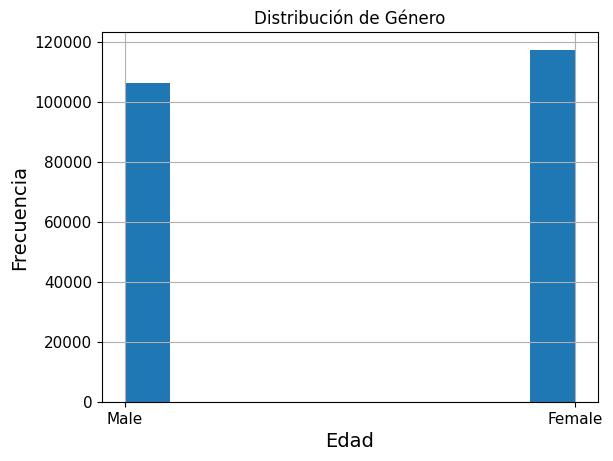

In [7]:
df["Sex"].hist() #histograma de la edad
plt.title("Distribución de Género") #titulo
plt.xlabel("Edad") #nombre variable x
plt.ylabel("Frecuencia") #nombre variable y
plt.show()

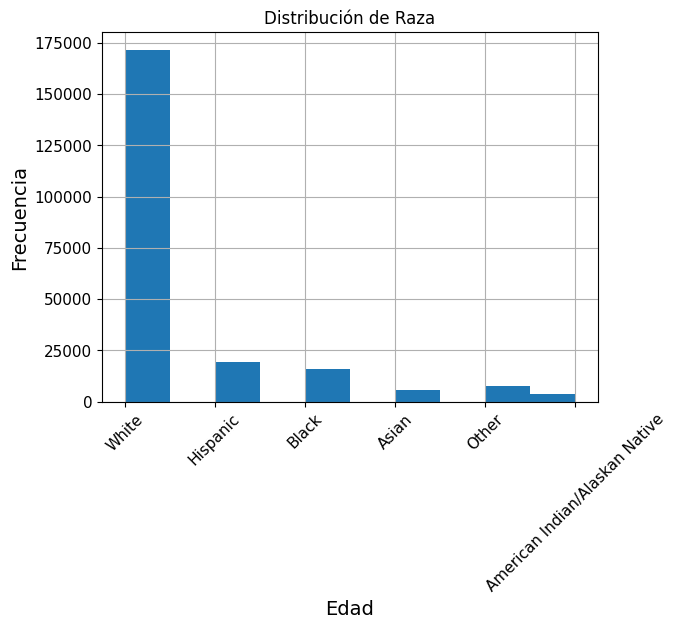

In [8]:
df["Race"].hist() #histograma de la edad
plt.title("Distribución de Raza") #titulo
plt.xlabel("Edad") #nombre variable x
plt.ylabel("Frecuencia") #nombre variable y
plt.xticks(rotation=45)
plt.show()

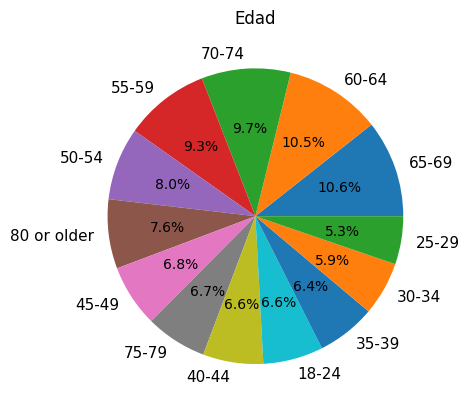

In [9]:
data = df["AgeCategory"]
datacount = df["AgeCategory"].value_counts()
# gráfico de pastel
plt.pie(datacount, labels= datacount.keys(), autopct='%1.1f%%') # se realiza el gráfico de pastel con labels y porcentaje a 1 decimal
plt.title("Edad") #título
plt.show()

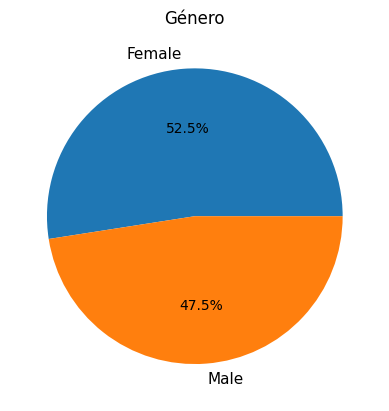

In [10]:
data = df["Sex"]
datacount = df["Sex"].value_counts()

plt.pie(datacount, labels= datacount.keys(), autopct='%1.1f%%')
plt.title("Género")
plt.show()

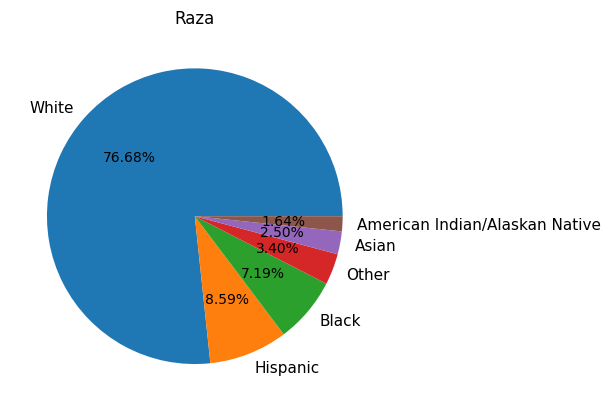

In [11]:
data = df["Race"]
datacount = df["Race"].value_counts()

plt.pie(datacount, labels= datacount.keys(), autopct='%1.2f%%')
plt.title("Raza")
plt.show()

La característica más comunes entre los pacientes de nuestro dataset es:
- Raza
 White: 76.68%

- Sexo
 Mujer: 52.5%
- Edad
 65-69 años: 10.6%
 /60-64 años: 10.5%
 /70-74 años: 9.7%

# **Análisis de Comportamiento de Salud**

- Analizar la prevalencia de comportamientos relacionados con la salud como el tabaquismo,
el consumo de alcohol, la actividad física y los patrones de sueño.
- Determinar qué comportamientos de salud son más comunes entre los
pacientes



*Para analizar la prevalencia utilizaremos el histograma, permitiendonos conocer la proporción de individuos que presentan este comportamiento*

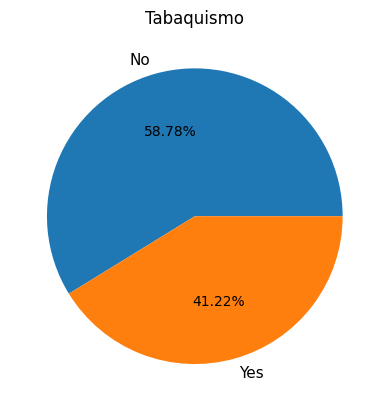

In [12]:
datacount = df["Smoking"].value_counts() #conteo
 # se realiza el gráfico de pastel con labels y porcentaje a 2 decimales
plt.pie(datacount, labels= datacount.keys(), autopct='%1.2f%%')
plt.title("Tabaquismo")
plt.show()

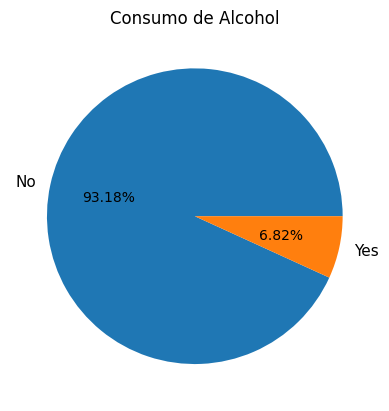

In [13]:
datacount = df["AlcoholDrinking"].value_counts()
 # se realiza el gráfico de pastel con labels y porcentaje a 2 decimales
plt.pie(datacount, labels= datacount.keys(), autopct='%1.2f%%')
plt.title("Consumo de Alcohol")
plt.show()

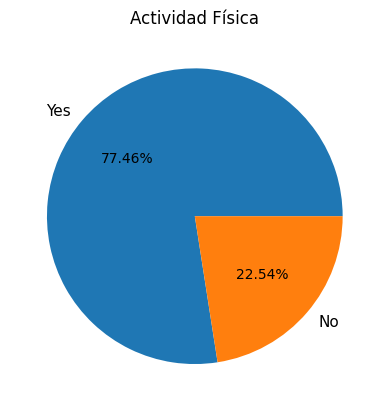

In [14]:
datacount = df["PhysicalActivity"].value_counts()
 # se realiza el gráfico de pastel con labels y porcentaje a 2 decimales
plt.pie(datacount, labels= datacount.keys(), autopct='%1.2f%%')
plt.title("Actividad Física")
plt.show()

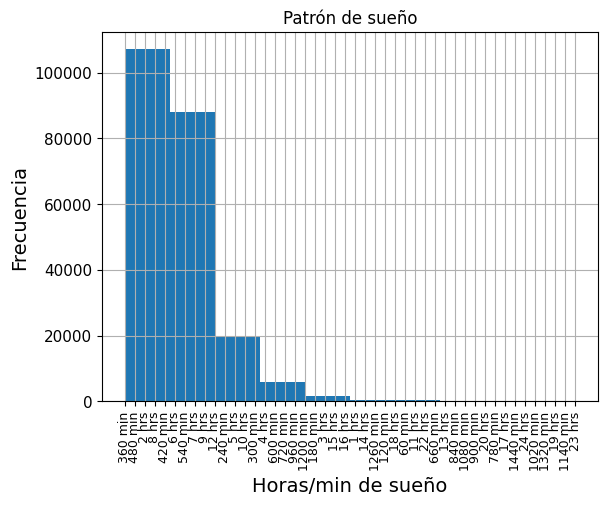

In [15]:
df["SleepTime"].hist()
plt.title("Patrón de sueño")
plt.xlabel("Horas/min de sueño")
plt.xticks(rotation=90, size=9) #cambiamos el tamaño y rotación de la etiqueta de x para mejor visualización
plt.ylabel("Frecuencia")
plt.show()

In [16]:
df["SleepTime"].value_counts()

SleepTime
7 hrs       45705
8 hrs       45529
6 hrs       31060
480 min     22950
420 min     22682
360 min     15556
5 hrs        8953
9 hrs        7520
300 min      4482
540 min      3661
10 hrs       3622
4 hrs        3575
240 min      1873
600 min      1814
12 hrs       1023
3 hrs         944
720 min       500
180 min       452
2 hrs         374
1 hrs         255
120 min       185
11 hrs        180
60 min        130
16 hrs        116
14 hrs        116
660 min       113
15 hrs         90
840 min        56
960 min        55
18 hrs         52
900 min        50
13 hrs         47
20 hrs         36
780 min        20
1080 min       18
1200 min       15
24 hrs         12
17 hrs         11
1440 min        9
22 hrs          7
1020 min        2
1320 min        2
1260 min        1
19 hrs          1
1140 min        1
23 hrs          1
Name: count, dtype: int64

Como podemos observar del análisis de comportamiento de salud, el 58.78% de los pacientes no fuman, el 93.18% no consume alcohol, y el 77.46% realiza actividad física. En cuanto a los patrones de sueño, se tiene un valor promedio de 7 horas, luego de haber sido procesado para expresarse únicamente en horas.



# **PREPROCESAMIENTO**
Se busca una disribución normal en nuestros datos, por lo que para esos datos que no se encuentren distribuidos normalmente hay que modificarlos.
En este caso no tenemos valores nulos, así que nos saltamos ese paso
1. Codificación de características y ajuste de las variables
2. Normalización y Escalado de datos








In [17]:
# Datos en un inicio:
df.head(10)

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,Yes,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Good,360 min,No,No,No,No
1,Patient_196414,37.59,Yes,No,No,7.0,20.0,No,Female,30-34,Hispanic,No,Yes,Very good,480 min,No,No,No,No
2,Patient_107743,19.37,Yes,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Good,2 hrs,No,No,No,No
3,Patient_28303,48.42,No,No,No,30.0,15.0,No,Female,30-34,White,No,Yes,Fair,8 hrs,No,No,No,No
4,Patient_118489,27.12,No,No,No,0.0,5.0,No,Male,65-69,White,No,Yes,Very good,360 min,Yes,No,No,No
5,Patient_244335,33.84,Yes,No,No,0.0,5.0,Yes,Female,65-69,White,Yes,No,Very good,8 hrs,No,No,No,Yes
6,Patient_84792,18.79,No,No,No,0.0,15.0,No,Female,18-24,White,No,Yes,Very good,8 hrs,No,No,No,No
7,Patient_304542,24.54,Yes,No,No,0.0,5.0,No,Female,35-39,White,No,Yes,Good,480 min,Yes,No,No,No
8,Patient_43240,40.18,No,No,No,15.0,5.0,Yes,Female,50-54,Black,No,No,Fair,360 min,Yes,No,No,No
9,Patient_302226,34.92,No,No,No,10.0,0.0,No,Male,55-59,White,Yes,Yes,Good,8 hrs,No,No,No,No


## **1. Codificación de características y ajuste de las variables de cada columna**


### *SleepTime*

In [18]:
# Convertir la columna 'SleepTime' a tipo string para manipulación
df['SleepTime'] = df['SleepTime'].astype(str)

# Eliminar el texto ' hrs' de los valores en la columna 'SleepTime'
df["SleepTime"] = df['SleepTime'].str.replace(' hrs', '')

#Función para convertir valores de minutos a horas.
def conversion_horas(value):
    # Verificar si el valor contiene 'min', indicando que está en minutos
    if 'min' in value:
        # Extraer el número de minutos y convertirlo a entero
        minutos = int(value.replace(' min', ''))
        # Convertir minutos a horas
        horas = minutos / 60
        return horas
    else:
        # Si el valor no contiene 'min', devolver el valor original
        return value

# Aplicar la función de conversión a la columna 'SleepTime'
df['SleepTime'] = df["SleepTime"].apply(conversion_horas)

# Convertir la columna 'SleepTime' a tipo float
df['SleepTime'] = df['SleepTime'].astype(float)
df['SleepTime'] = df['SleepTime'] / 24
# Mostrar las primeras 10 filas del DataFrame para verificar los cambios
df.head(10)


,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,Yes,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Good,0.250000,No,No,No,No
1,Patient_196414,37.59,Yes,No,No,7.0,20.0,No,Female,30-34,Hispanic,No,Yes,Very good,0.333333,No,No,No,No
2,Patient_107743,19.37,Yes,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Good,0.083333,No,No,No,No
3,Patient_28303,48.42,No,No,No,30.0,15.0,No,Female,30-34,White,No,Yes,Fair,0.333333,No,No,No,No
4,Patient_118489,27.12,No,No,No,0.0,5.0,No,Male,65-69,White,No,Yes,Very good,0.250000,Yes,No,No,No
5,Patient_244335,33.84,Yes,No,No,0.0,5.0,Yes,Female,65-69,White,Yes,No,Very good,0.333333,No,No,No,Yes
6,Patient_84792,18.79,No,No,No,0.0,15.0,No,Female,18-24,White,No,Yes,Very good,0.333333,No,No,No,No
7,Patient_304542,24.54,Yes,No,No,0.0,5.0,No,Female,35-39,White,No,Yes,Good,0.333333,Yes,No,No,No
8,Patient_43240,40.18,No,No,No,15.0,5.0,Yes,Female,50-54,Black,No,No,Fair,0.250000,Yes,No,No,No
9,Patient_302226,34.92,No,No,No,10.0,0.0,No,Male,55-59,White,Yes,Yes,Good,0.333333,No,No,No,No


### Variables categoricas, ordinales y binarias
- Race, GenHealth, Age & Diabetes- Variable categorica/ordinal
- Variables dicotomicas, Yes/No and Female/Male  --> 1/0



In [19]:
# se define la función para el procesamiento de las variables categoricas, ordinales y binarias
def enc_ordinal (df, column_name, categories):
    encoder = OrdinalEncoder(categories=[categories]) # Crear el codificador ordinal con las categorías especificadas
    encoder.fit(df[[column_name]]) # Ajustar el codificador a la columna especificada
    df[column_name] = encoder.fit_transform(df[[column_name]]) # Transformar la columna original y crear una nueva columna con el sufijo '_cat'


In [20]:
enc_ordinal(df, "GenHealth", categories=["Excellent","Very good","Good","Fair","Poor"])
enc_ordinal(df, "Race", categories=[ "White", "Hispanic","Black", "Other","Asian","American Indian/Alaskan Native"])
enc_ordinal(df, "Diabetic", categories=["No", "No, borderline diabetes","Yes", "Yes (during pregnancy)"])
enc_ordinal(df, "AgeCategory", categories=["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69",
                                      "70-74","75-79","80 or older"])
enc_ordinal(df, "HeartDisease", categories=["No", "Yes"])
enc_ordinal(df, "KidneyDisease", categories=["No", "Yes"])
enc_ordinal(df, "SkinCancer", categories=["No", "Yes"])
enc_ordinal(df, "Asthma", categories=["No", "Yes"])
enc_ordinal(df, "Stroke", categories=["No", "Yes"])
enc_ordinal(df, "DiffWalking", categories=["No", "Yes"])
enc_ordinal(df, "PhysicalActivity", categories=["No", "Yes"])
enc_ordinal(df, "Smoking", categories=["No", "Yes"])
enc_ordinal(df, "AlcoholDrinking", categories=["No", "Yes"])
enc_ordinal(df, "Sex", categories=["Male", "Female"])


luego de realizar los cambios, nos queda lo siguiente:

In [21]:
df.head()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,Patient_118020,45.61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.250000,0.0,0.0,0.0,0.0
1,Patient_196414,37.59,1.0,0.0,0.0,7.0,20.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.333333,0.0,0.0,0.0,0.0
2,Patient_107743,19.37,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,2.0,0.083333,0.0,0.0,0.0,0.0
3,Patient_28303,48.42,0.0,0.0,0.0,30.0,15.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.333333,0.0,0.0,0.0,0.0
4,Patient_118489,27.12,0.0,0.0,0.0,0.0,5.0,0.0,0.0,9.0,0.0,0.0,1.0,1.0,0.250000,1.0,0.0,0.0,0.0


### *Filtro de la columna ID*

In [22]:
#Se extraen los elementos tipo str del ID y nos quedamos con los valores int
df["Patient_ID"] = df["Patient_ID"].str.extract(r"(\d+)").astype(int)


### Datos luego de ser procesados

In [23]:
# Datos al final:
df.head(10)

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,118020,45.61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.250000,0.0,0.0,0.0,0.0
1,196414,37.59,1.0,0.0,0.0,7.0,20.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.333333,0.0,0.0,0.0,0.0
2,107743,19.37,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,2.0,0.083333,0.0,0.0,0.0,0.0
3,28303,48.42,0.0,0.0,0.0,30.0,15.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.333333,0.0,0.0,0.0,0.0
4,118489,27.12,0.0,0.0,0.0,0.0,5.0,0.0,0.0,9.0,0.0,0.0,1.0,1.0,0.250000,1.0,0.0,0.0,0.0
5,244335,33.84,1.0,0.0,0.0,0.0,5.0,1.0,1.0,9.0,0.0,2.0,0.0,1.0,0.333333,0.0,0.0,0.0,1.0
6,84792,18.79,0.0,0.0,0.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.0,0.0,0.0,0.0
7,304542,24.54,1.0,0.0,0.0,0.0,5.0,0.0,1.0,3.0,0.0,0.0,1.0,2.0,0.333333,1.0,0.0,0.0,0.0
8,43240,40.18,0.0,0.0,0.0,15.0,5.0,1.0,1.0,6.0,2.0,0.0,0.0,3.0,0.250000,1.0,0.0,0.0,0.0
9,302226,34.92,0.0,0.0,0.0,10.0,0.0,0.0,0.0,7.0,0.0,2.0,1.0,2.0,0.333333,0.0,0.0,0.0,0.0


## **2. Checamos la normalización de las variables**

El histograma es una herramienta que nos permite revisar la distribución normal de las variables así como también nos puede permitir ver si hay outliners.

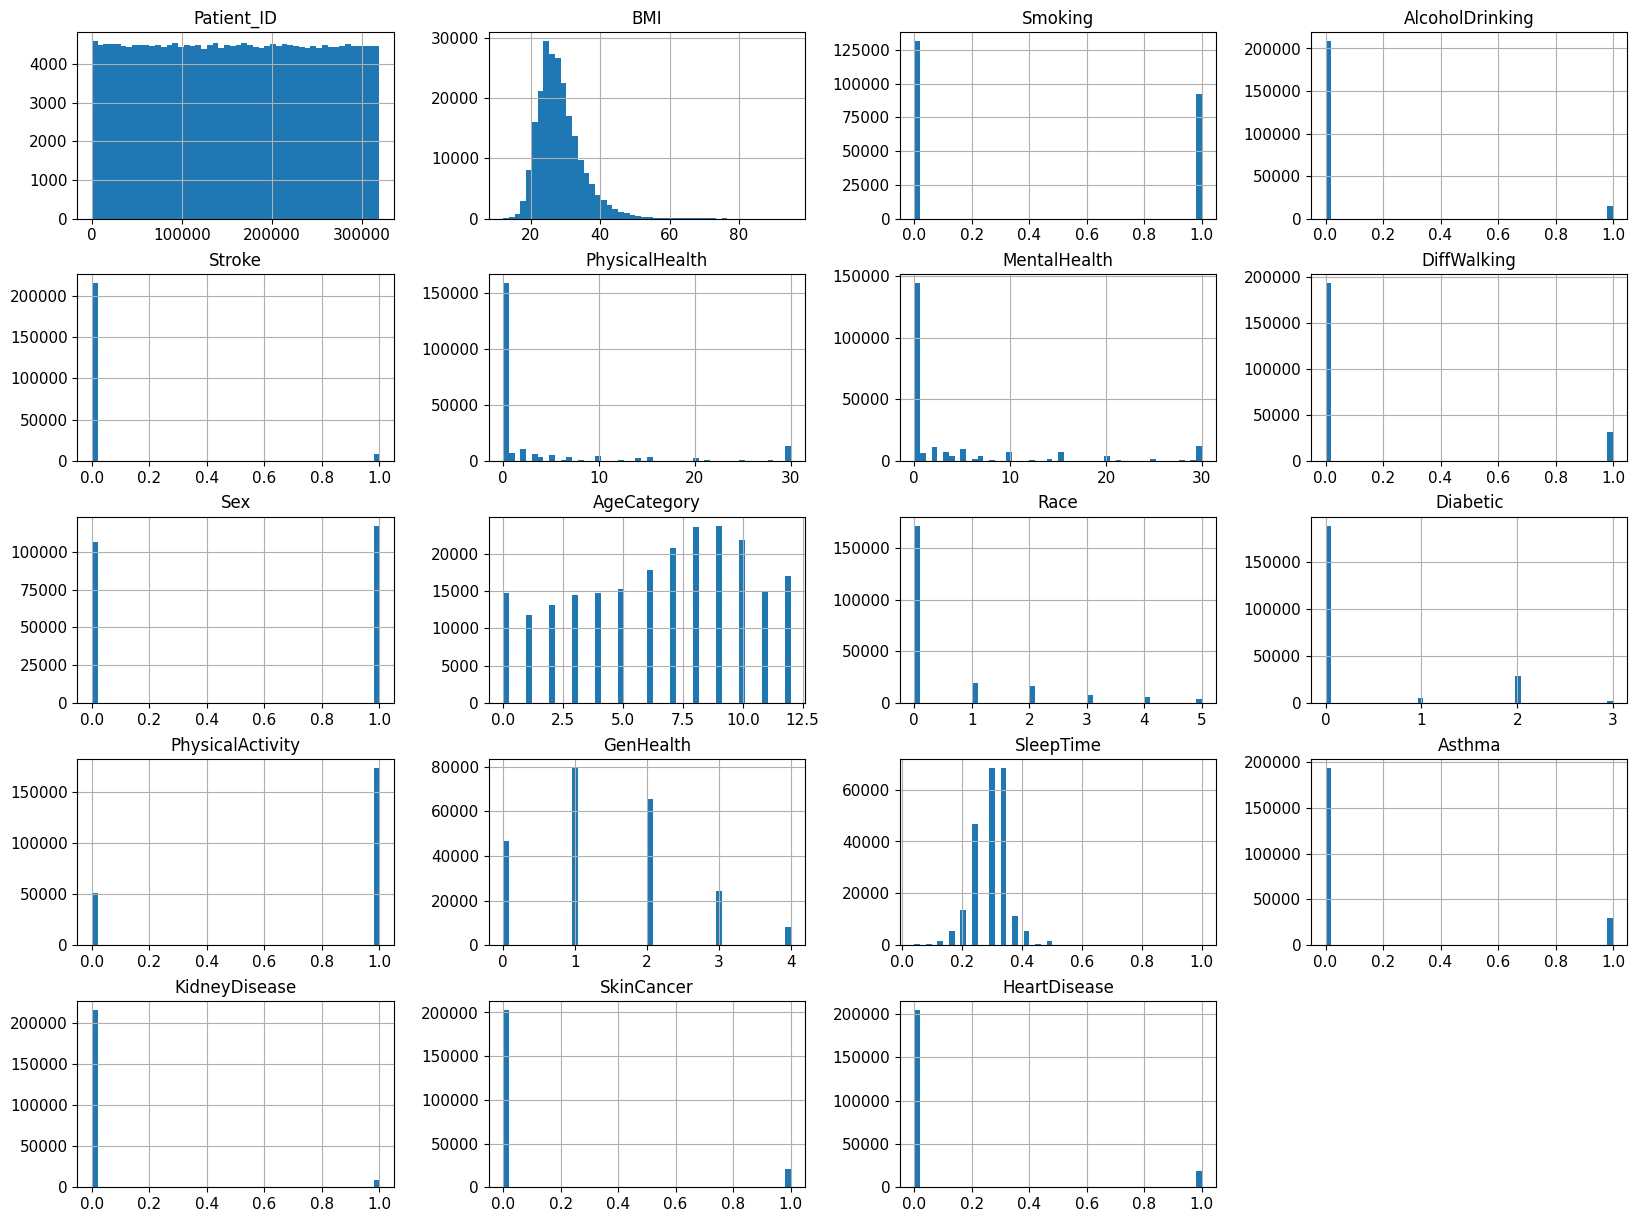

In [24]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**MaxAbsScaler** escala y traslada cada característica del array de entrada de forma que el valor absoluto máximo de cada una sea 1.0 (es decir, todas las características pasan a tener valores en el rango [-1, 1]).

https://interactivechaos.com/es/manual/tutorial-de-machine-learning/maxabsscaler

In [25]:
# Columnas a transformar (variables numéricas)
columns_to_transform = ["SleepTime", "BMI","PhysicalHealth","MentalHealth","Race","Diabetic","GenHealth","AgeCategory"]

# Crear una copia del DataFrame para realizar las transformaciones
df_copy = df.copy()


In [26]:
#Aplicar MaxAbsScaler
scaler = MaxAbsScaler()
df_copy[columns_to_transform] = scaler.fit_transform(df_copy[columns_to_transform])

# Verifica el número de registros
print(f'Length del dataset: {len(df_copy)}')

Length del dataset: 223856


Después de escalar los datos con MaxAbsScaler, aplicamos la transformación Box-Cox para hacer que los datos sigan una distribución más normal.

**BOXCOX**, nos ayuda a transformar datos no normales a datos con distribución normal. Permitiendonos mejorar la predicción usando regresión lineal

In [27]:
# Aplicar Box-Cox Transformation
for column in columns_to_transform:
    # Box-Cox requiere que todos los valores sean positivos. Agregamos 1 para asegurar esto.
    df_copy[column], _ = boxcox(df_copy[column]+1)

# Verifica el número de registro
print(f'Length del dataset: {len(df_copy)}')

Length del dataset: 223856


In [28]:
# Mostrar los primeros registros del DataFrame transformado
df_copy.head()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,118020,0.152430,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.266071,0.000000,0.0,1.0,0.392193,0.214224,0.0,0.0,0.0,0.0
1,196414,0.145544,1.0,0.0,0.0,0.089981,0.125404,0.0,1.0,0.173893,0.081291,0.0,1.0,0.219084,0.272972,0.0,0.0,0.0,0.0
2,107743,0.112715,1.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.562246,0.000000,0.0,1.0,0.392193,0.078875,0.0,0.0,0.0,0.0
3,28303,0.154261,0.0,0.0,0.0,0.103578,0.122403,0.0,1.0,0.173893,0.000000,0.0,1.0,0.534544,0.272972,0.0,0.0,0.0,0.0
4,118489,0.130827,0.0,0.0,0.0,0.000000,0.089527,0.0,0.0,0.886051,0.000000,0.0,1.0,0.219084,0.214224,1.0,0.0,0.0,0.0


Podemos confirmar los cambios en la distribución de las columnas con el método describe, que ofrece información estadística del DataFrame:






In [29]:
df_copy.describe()

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000,223856.000000
mean,159639.127511,0.131219,0.412220,0.068173,0.037488,0.022581,0.032857,0.138634,0.524632,0.635506,0.020804,0.012274,0.774632,0.273496,0.245784,0.134582,0.036863,0.093167,0.085595
std,92385.084641,0.010009,0.492236,0.252044,0.189956,0.037992,0.048262,0.345565,0.499394,0.368441,0.037841,0.028432,0.417825,0.182467,0.041730,0.341277,0.188426,0.290667,0.279766
min,2.000000,0.085577,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040517,0.000000,0.000000,0.000000,0.000000
25%,79631.500000,0.124571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.361587,0.000000,0.000000,1.000000,0.219084,0.214224,0.000000,0.000000,0.000000,0.000000
50%,159574.500000,0.131196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.667215,0.000000,0.000000,1.000000,0.219084,0.244246,0.000000,0.000000,0.000000,0.000000
75%,239590.250000,0.137871,1.000000,0.000000,0.000000,0.048048,0.067167,0.000000,1.000000,0.886051,0.000000,0.000000,1.000000,0.392193,0.272972,0.000000,0.000000,0.000000,0.000000
max,319795.000000,0.166183,1.000000,1.000000,1.000000,0.103578,0.127185,1.000000,1.000000,1.235556,0.095336,0.078491,1.000000,0.654960,0.611775,1.000000,1.000000,1.000000,1.000000


Al observar los valores de min y max, podemos observar que en todos los casos el valor max es de 1 y el valor min es proporcional a este valor max, además de que ahora el promedio no esta tan desviado de los valores min y max

##  Histogramas que prueban la normalización

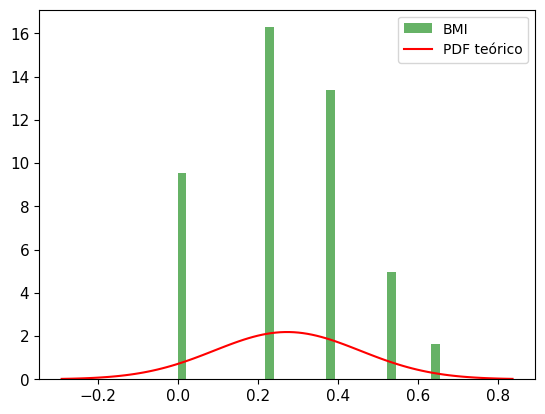

In [30]:
# Define the distribution
dist = norm(loc=0.273496	, scale=0.182467)
# Generate values for the theoretical PDF
x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)

# Plot the histogram of the BMI data
plt.hist(df_copy['GenHealth'], density=True, bins=30, alpha=0.6, color='g', label='BMI')
# Plot the theoretical PDF
plt.plot(x, dist.pdf(x), 'r-', label='PDF teórico')

# Add legend
plt.legend()

# Show plot
plt.show()



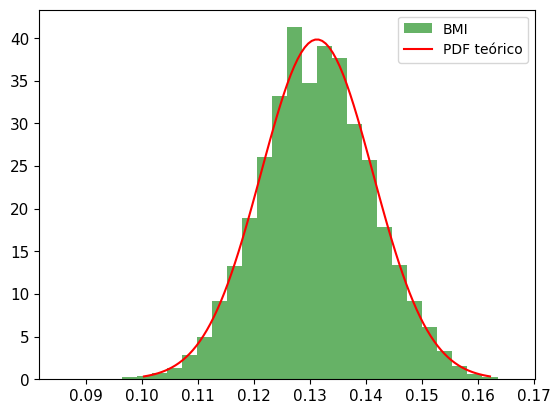

In [31]:
# Definimos la disribución agregando loc=mean de la columna y scale=std
dist = norm(loc=0.131219, scale=0.010009)

# Generate values for the theoretical PDF
x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)

# Plot the histogram of the BMI data
plt.hist(df_copy['BMI'], density=True, bins=30, alpha=0.6, color='g', label='BMI')

# Plot the theoretical PDF
plt.plot(x, dist.pdf(x), 'r-', label='PDF teórico')

# Add legend
plt.legend()

# Show plot
plt.show()


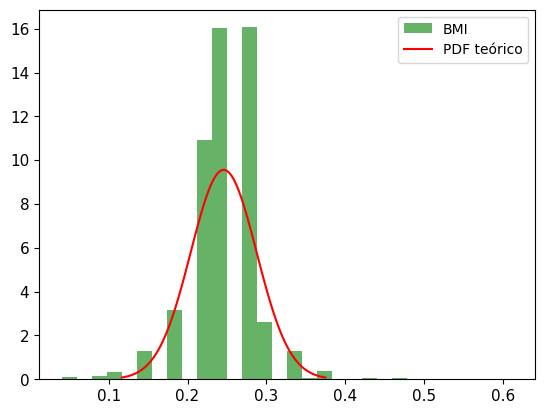

In [32]:
# Define the distribution
dist = norm(loc=0.245784, scale=0.041730)

# Generate values for the theoretical PDF
x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)

# Plot the histogram of the BMI data
plt.hist(df_copy['SleepTime'], density=True, bins=30, alpha=0.6, color='g', label='BMI')

# Plot the theoretical PDF
plt.plot(x, dist.pdf(x), 'r-', label='PDF teórico')

# Add legend
plt.legend()

# Show plot
plt.show()


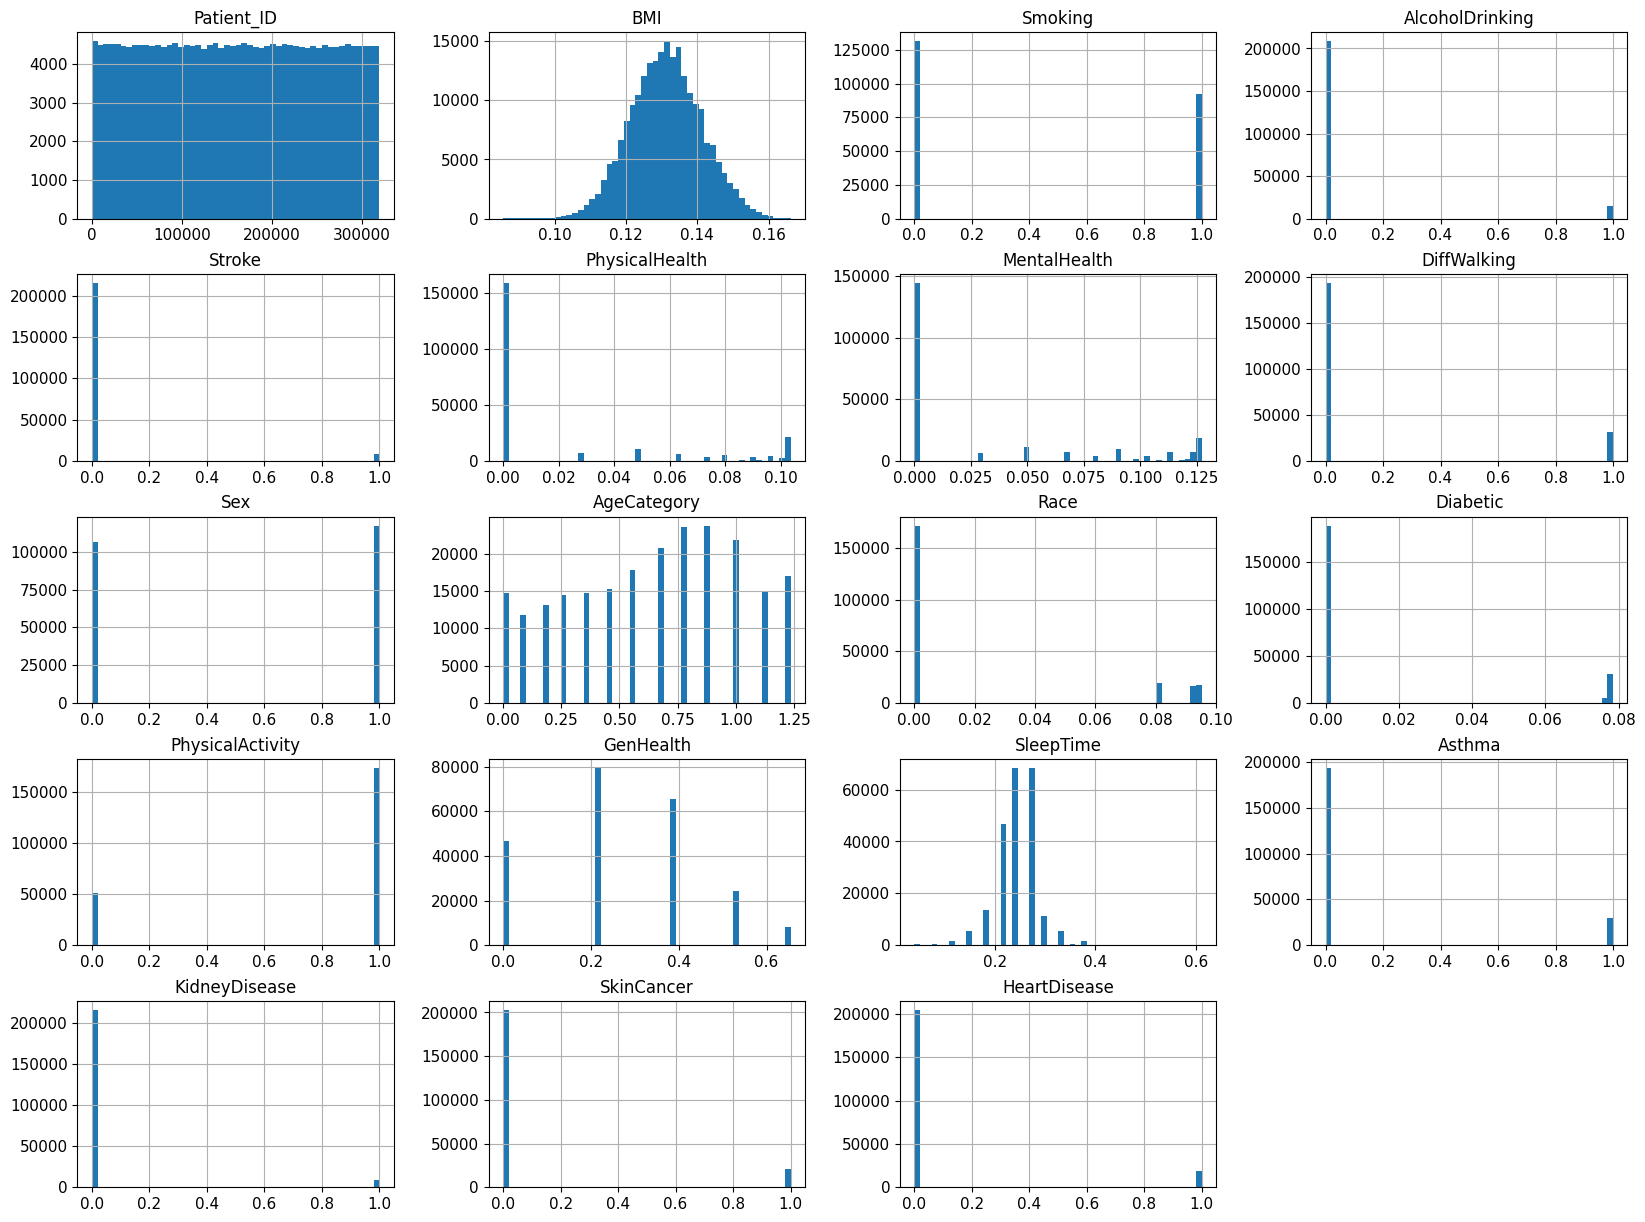

In [33]:
%matplotlib inline
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

#**CREACIÓN DEL TEST SET**



En este caso, se utilizó el valor de 0.2 debido a que:
* 20% de nuestros datos --> se usarán para el test set y el
* 80% de los datos --> training set

In [34]:
 ##Se divide el dataframe(df) en dos conjuntos aleatorios, train y test set donde el 0.2 representa que el 20% se asignan al test y 80% al train
train_set, test_set = train_test_split(df_copy, test_size=0.2, random_state=42)
test_set.head(10)

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
190914,86572,0.144491,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.460342,0.000000,0.078385,1.0,0.392193,0.244246,0.0,0.0,0.0,0.0
150762,64481,0.126698,1.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.667215,0.000000,0.000000,1.0,0.000000,0.244246,0.0,0.0,0.0,0.0
189532,280532,0.148578,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.775174,0.000000,0.078385,1.0,0.219084,0.244246,0.0,0.0,0.0,0.0
82258,314988,0.116170,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.173893,0.095202,0.076492,1.0,0.534544,0.244246,0.0,0.0,0.0,0.0
181317,115837,0.128009,0.0,0.0,1.0,0.103407,0.122403,0.0,1.0,0.999780,0.000000,0.000000,0.0,0.219084,0.300495,0.0,0.0,0.0,0.0
134118,295207,0.116709,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.562246,0.000000,0.000000,1.0,0.219084,0.272972,0.0,0.0,1.0,0.0
146923,217859,0.134328,1.0,0.0,0.0,0.000000,0.000000,0.0,1.0,1.235556,0.000000,0.000000,1.0,0.392193,0.326900,0.0,0.0,0.0,0.0
199776,34295,0.134999,1.0,1.0,0.0,0.099664,0.000000,0.0,0.0,0.667215,0.000000,0.076492,1.0,0.219084,0.272972,0.0,0.0,0.0,0.0
223251,49163,0.119229,0.0,0.0,0.0,0.000000,0.079791,0.0,0.0,0.085162,0.000000,0.000000,1.0,0.219084,0.272972,0.0,0.0,0.0,0.0
166226,312027,0.131086,1.0,0.0,0.0,0.048048,0.127185,0.0,0.0,0.886051,0.000000,0.000000,1.0,0.392193,0.244246,0.0,0.0,0.0,0.0


In [35]:
#como podemos observar se tomaron filas aleatorias para el train set
train_set.head(10)

,Patient_ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
41894,288080,0.140437,1.0,0.0,0.0,0.000000,0.114309,0.0,0.0,0.562246,0.000000,0.078385,0.0,0.392193,0.214224,1.0,0.0,0.0,0.0
7777,18900,0.128070,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.562246,0.000000,0.000000,1.0,0.219084,0.272972,0.0,0.0,0.0,0.0
56778,222504,0.132854,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.886051,0.000000,0.076492,0.0,0.000000,0.326900,0.0,0.0,0.0,0.0
144927,94710,0.134999,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.266071,0.000000,0.000000,1.0,0.392193,0.244246,0.0,0.0,0.0,0.0
20764,305719,0.132923,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.999780,0.000000,0.000000,1.0,0.219084,0.244246,0.0,0.0,0.0,0.0
100439,262585,0.150376,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.085162,0.000000,0.000000,1.0,0.392193,0.244246,1.0,0.0,0.0,0.0
25866,150843,0.111654,1.0,0.0,0.0,0.103578,0.122403,1.0,1.0,1.116301,0.000000,0.000000,1.0,0.392193,0.300495,0.0,0.0,1.0,0.0
47862,66654,0.138376,1.0,0.0,0.0,0.103528,0.000000,0.0,1.0,0.562246,0.094711,0.076492,0.0,0.392193,0.182800,0.0,0.0,0.0,0.0
7469,133047,0.151479,1.0,0.0,0.0,0.000000,0.050667,1.0,1.0,0.667215,0.000000,0.000000,1.0,0.392193,0.214224,0.0,0.0,0.0,0.0
46641,165098,0.113179,1.0,0.0,0.0,0.000000,0.000000,0.0,1.0,1.116301,0.000000,0.000000,1.0,0.000000,0.272972,0.0,0.0,0.0,0.0


In [36]:
# imprimimos la cantidad de datos del trainset y del test set
len(train_set)

179084

In [37]:
len(test_set)

44772

In [38]:
#Copiamos el train set para realizar pruebas
#df_copy= train_set.copy()

# **Análisis entre variables**

## *Correlación de Pearson*

In [39]:
corr_matrix = df.corr()
corr_matrix["HeartDisease"].sort_values(ascending=False)

HeartDisease        1.000000
GenHealth           0.242293
AgeCategory         0.232444
DiffWalking         0.200430
Stroke              0.195327
PhysicalHealth      0.168404
Diabetic            0.167596
KidneyDisease       0.145813
Smoking             0.107095
SkinCancer          0.094532
BMI                 0.049779
Asthma              0.041467
MentalHealth        0.027222
SleepTime           0.008445
Patient_ID         -0.002803
Race               -0.025567
AlcoholDrinking    -0.031186
Sex                -0.071285
PhysicalActivity   -0.099924
Name: HeartDisease, dtype: float64

In [40]:
corr_matrix = df_copy.corr()
corr_matrix["HeartDisease"].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.235989
GenHealth           0.229164
DiffWalking         0.200430
Stroke              0.195327
Diabetic            0.169991
PhysicalHealth      0.152197
KidneyDisease       0.145813
Smoking             0.107095
SkinCancer          0.094532
BMI                 0.052565
Asthma              0.041467
SleepTime           0.003581
MentalHealth        0.000678
Patient_ID         -0.002803
AlcoholDrinking    -0.031186
Race               -0.038009
Sex                -0.071285
PhysicalActivity   -0.099924
Name: HeartDisease, dtype: float64

In [41]:
corr_matrix = df_copy.corr()
corr_matrix["Diabetic"].sort_values(ascending=False)

Diabetic            1.000000
GenHealth           0.265585
DiffWalking         0.207402
BMI                 0.206030
AgeCategory         0.203739
HeartDisease        0.169991
PhysicalHealth      0.142544
KidneyDisease       0.141320
Stroke              0.104475
Race                0.056623
Smoking             0.055788
Asthma              0.051039
SkinCancer          0.034701
MentalHealth        0.009202
Sex                 0.002063
Patient_ID         -0.000195
SleepTime          -0.003458
AlcoholDrinking    -0.058523
PhysicalActivity   -0.136073
Name: Diabetic, dtype: float64

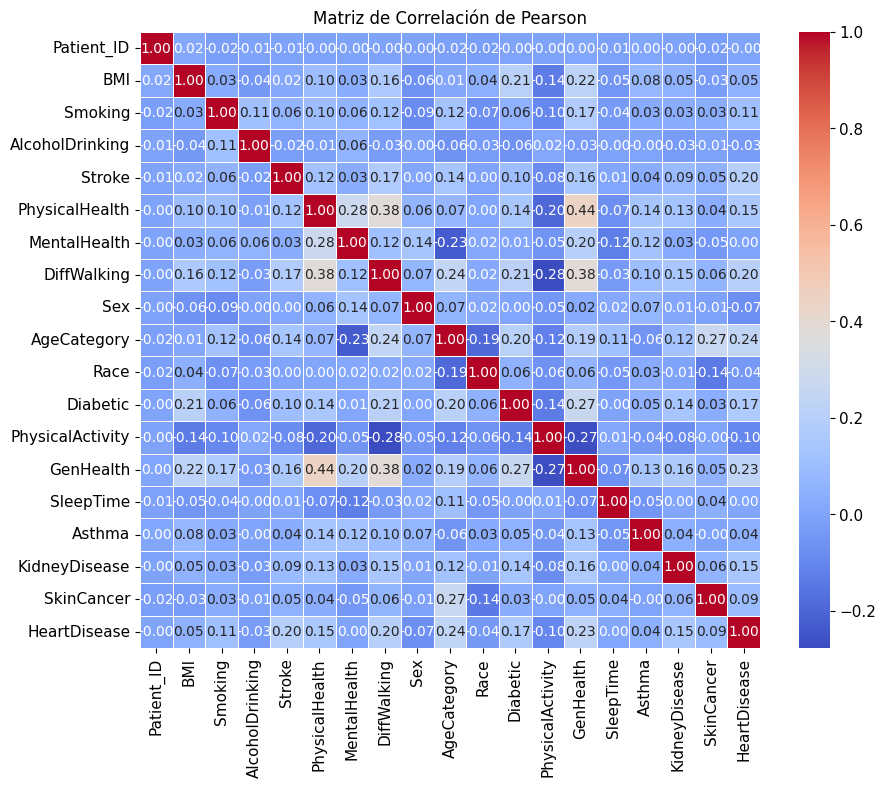

In [42]:
corr_matrix = df_copy.corr(method='pearson')

# Crear el heatmap
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura según tus necesidades
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Pearson')
plt.show()

Donde:
* 0 a 0.1 - no hay correlación
* 0.1 a 0.3 - poca correlación
* 0.3 a 0.5 - correlación media
* 0.5 a 0.7 - correlación alta
* 0.7 a 1 - correlación muy alta

*Relación entre los comportamientos de salud y enfermedades crónicas*
- Investigar cualquier relación entre los comportamientos de salud y la presencia de enfermedades crónicas como enfermedades cardíacas o diabetes.

Se pudo ver una relación significativa y esperable al momento de analizar las relación de la diabetes y el estado de salud (Gen Health) siendo directamente proporcional - donde 0 es excellent y poor es 1.

No obstante, no se pudieron encontrar relación entre los comportamientos de salud y la presencia de enfermedades crónicas como enfermedades cardíacas o diabetes.



# **ENTRENAMIENTO Y EVALUACIÓN** -

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform


 *1. Preparación de los datos*

In [44]:
# Separar las etiquetas
df_labels = df_copy["HeartDisease"].copy()


In [45]:
# Dividir el conjunto de entrenamiento en características y etiquetas
X_train = train_set.drop("HeartDisease", axis=1)
y_train = train_set["HeartDisease"]

# Dividir el conjunto de prueba en características y etiquetas
X_test = test_set.drop("HeartDisease", axis=1)
y_test = test_set["HeartDisease"]

##**Hiperparametros, Modelo y Evaluación**
 Encontramos la configuración óptima de hiperparámetros para el modelo de manera eficiente, maximizando el rendimiento predictivo y generalizando bien a nuevos datos. Realizamos una búsqueda de hiperparámetros utilizando `RandomizedSearchCV` con un modelo de `RandomForestClassifier` y un conjunto de datos dividido en entrenamiento y prueba



Primero se evaluará con pocas iteraciones, y por tantos pocos fits


In [46]:
# 2. Definir el modelo correctamente
model = RandomForestClassifier(random_state=42)

In [47]:
# 3. Definir los hiperparámetros y sus distribuciones
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}



 **Configurar RandomizedSearchCV,  para una búsqueda aleatoria de hiperpárametros**

* estimator: El modelo de clasificación (RandomForestClassifier en este caso).
* param_distributions: Las distribuciones de los hiperparámetros a explorar.
* n_iter: El número de configuraciones de hiperparámetros que se van a probar.
* cv: El número de pliegues para la validación cruzada.
* random_state: Semilla aleatoria para garantizar reproducibilidad.
* n_jobs: Número de núcleos de CPU a utilizar (-1 para utilizar todos los disponibles).
* verbose: Nivel de verbosidad para mostrar detalles durante el ajuste del modelo.



In [48]:
# 4. Configurar RandomizedSearchCV,  para una búsqueda aleatoria de hiperpárametros
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=5, random_state=42, n_jobs=-1, verbose=2)

# 5. Ajustar el modelo, para probar todas las combinaciones posibles de hiperparámetros
random_search.fit(X_train, y_train)

# 6. Obtener los mejores hiperparámetros
print("Mejores hiperparámetros:", random_search.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 249}


In [49]:
# 7. Evaluar el modelo con los mejores hiperparámetros
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


In [50]:
# 8. Calcular y mostrar métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9165996605020995
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     40978
         1.0       0.69      0.03      0.06      3794

    accuracy                           0.92     44772
   macro avg       0.80      0.51      0.51     44772
weighted avg       0.90      0.92      0.88     44772



con más iteraciones

In [ ]:

# Definir el modelo correctamente
model = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros y sus distribuciones
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=3, random_state=42, n_jobs=-1, verbose=2)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros:", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
# Evaluar el modelo con los mejores hiperparámetros
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
# Calcular y mostrar métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))